In [52]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt

In [53]:
data = pd.read_csv('../raw_data/price_volume_sentiment_perday.csv', lineterminator='\n')

In [54]:
data

,Unnamed: 0,date,negative_bert,neutral_bert,positive_bert,MA20_Sentiment,MA50_Sentiment,MA7_Sentiment,BTC_new,bitcoin_volume
0,0,2021-01-01,0.083330,0.493347,0.423323,NaN,NaN,NaN,29374.152344,40730301359
1,1,2021-01-02,0.134531,0.438811,0.426658,NaN,NaN,NaN,32127.267578,67865420765
2,2,2021-01-03,0.147802,0.428930,0.423267,NaN,NaN,NaN,32782.023438,78665235202
3,3,2021-01-04,0.104159,0.507274,0.388567,NaN,NaN,NaN,31971.914062,81163475344
4,4,2021-01-05,0.081743,0.521464,0.396793,NaN,NaN,NaN,33992.429688,67547324782
...,...,...,...,...,...,...,...,...,...,...
793,793,2023-03-05,0.107813,0.541465,0.350722,0.358391,0.363660,0.355912,22435.513672,13317001733
794,794,2023-03-06,0.109010,0.507571,0.383419,0.359776,0.363419,0.361018,22429.757812,17353192895
795,795,2023-03-07,0.123972,0.520640,0.355388,0.359762,0.363403,0.362125,22219.769531,22765452204
796,796,2023-03-08,0.087879,0.515427,0.396694,0.360095,0.364243,0.367621,21718.080078,22536575684


In [55]:
data = data.drop(columns = ['Unnamed: 0'])

In [56]:
data['date'] = pd.to_datetime(data['date'])


In [57]:
scaler = data['BTC_new'].max()/data['bitcoin_volume'].max()

In [58]:
data['BTC_new'].max()

67566.828125

In [59]:
sns.axes_style("darkgrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [60]:
data['volume_scaled'] = data['bitcoin_volume']*scaler

In [62]:
data

,date,negative_bert,neutral_bert,positive_bert,MA20_Sentiment,MA50_Sentiment,MA7_Sentiment,BTC_new,bitcoin_volume,volume_scaled
0,2021-01-01,0.083330,0.493347,0.423323,NaN,NaN,NaN,29374.152344,40730301359,7841.221223
1,2021-01-02,0.134531,0.438811,0.426658,NaN,NaN,NaN,32127.267578,67865420765,13065.156895
2,2021-01-03,0.147802,0.428930,0.423267,NaN,NaN,NaN,32782.023438,78665235202,15144.290398
3,2021-01-04,0.104159,0.507274,0.388567,NaN,NaN,NaN,31971.914062,81163475344,15625.240771
4,2021-01-05,0.081743,0.521464,0.396793,NaN,NaN,NaN,33992.429688,67547324782,13003.918434
...,...,...,...,...,...,...,...,...,...,...
793,2023-03-05,0.107813,0.541465,0.350722,0.358391,0.363660,0.355912,22435.513672,13317001733,2563.731500
794,2023-03-06,0.109010,0.507571,0.383419,0.359776,0.363419,0.361018,22429.757812,17353192895,3340.761543
795,2023-03-07,0.123972,0.520640,0.355388,0.359762,0.363403,0.362125,22219.769531,22765452204,4382.706266
796,2023-03-08,0.087879,0.515427,0.396694,0.360095,0.364243,0.367621,21718.080078,22536575684,4338.643950


ValueError: Could not interpret value `date` for parameter `x`

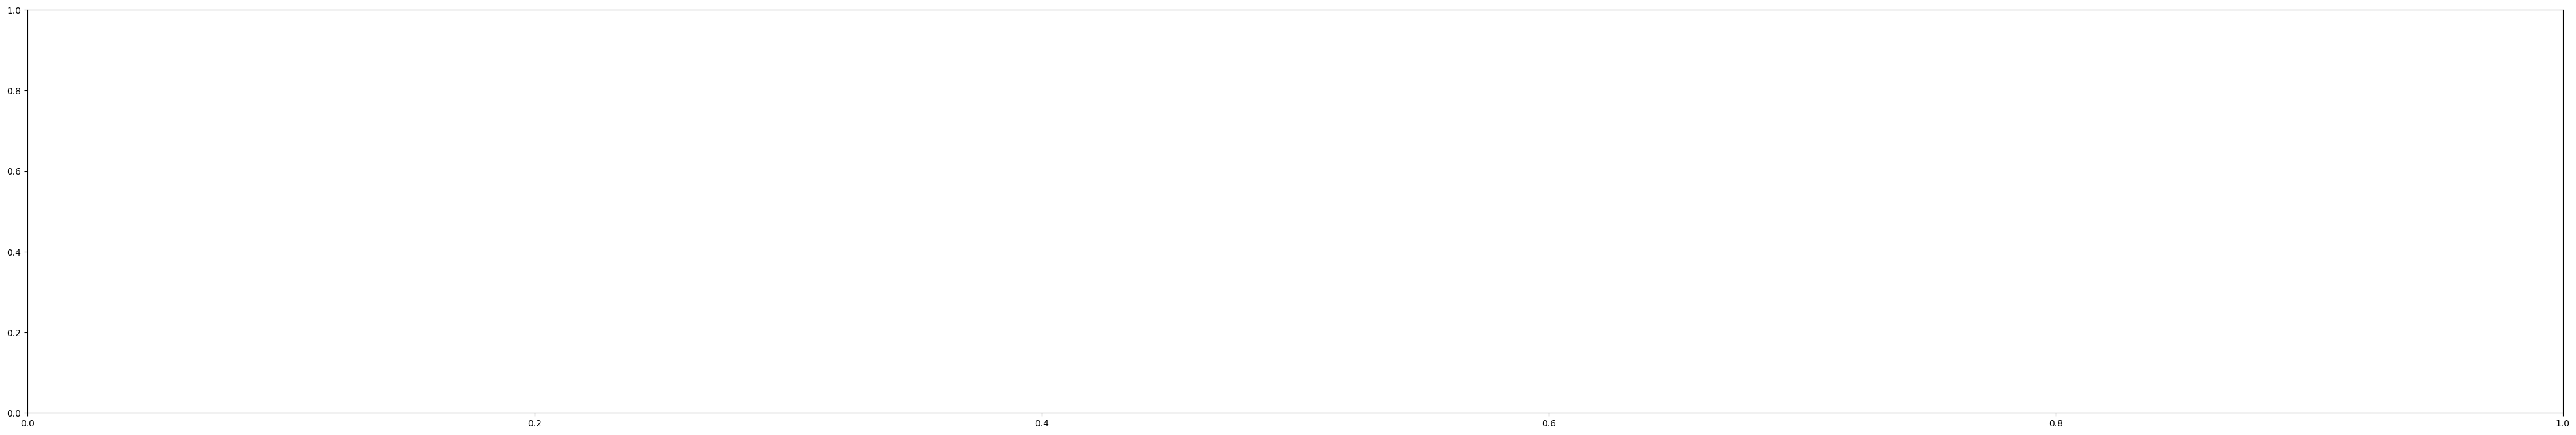

In [61]:
# with sns.axes_style("darkgrid"):
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(50,8))

sns.lineplot(data = data[['BTC_new','volume_scaled']], x = 'date', marker='o', sort = False)
# sns.lineplot(data = data2['BTC_price_adjclose'], marker='o', sort = False, ax=ax1)

ax2 = ax1.twinx()
data3 = data[['MA7_Sentiment']]
sns.lineplot(data = data3,x = 'date', marker='o', sort = False, ax=ax2,palette=['r', 'g'])

    # sns.barplot(data = data2, x=data2.index, y=, alpha=0.5, ax=ax2)
    # sns.regplot(x=data1['date'], y=data1['positive_bert'], scatter=False)

<Axes: xlabel='date', ylabel='positive_bert'>

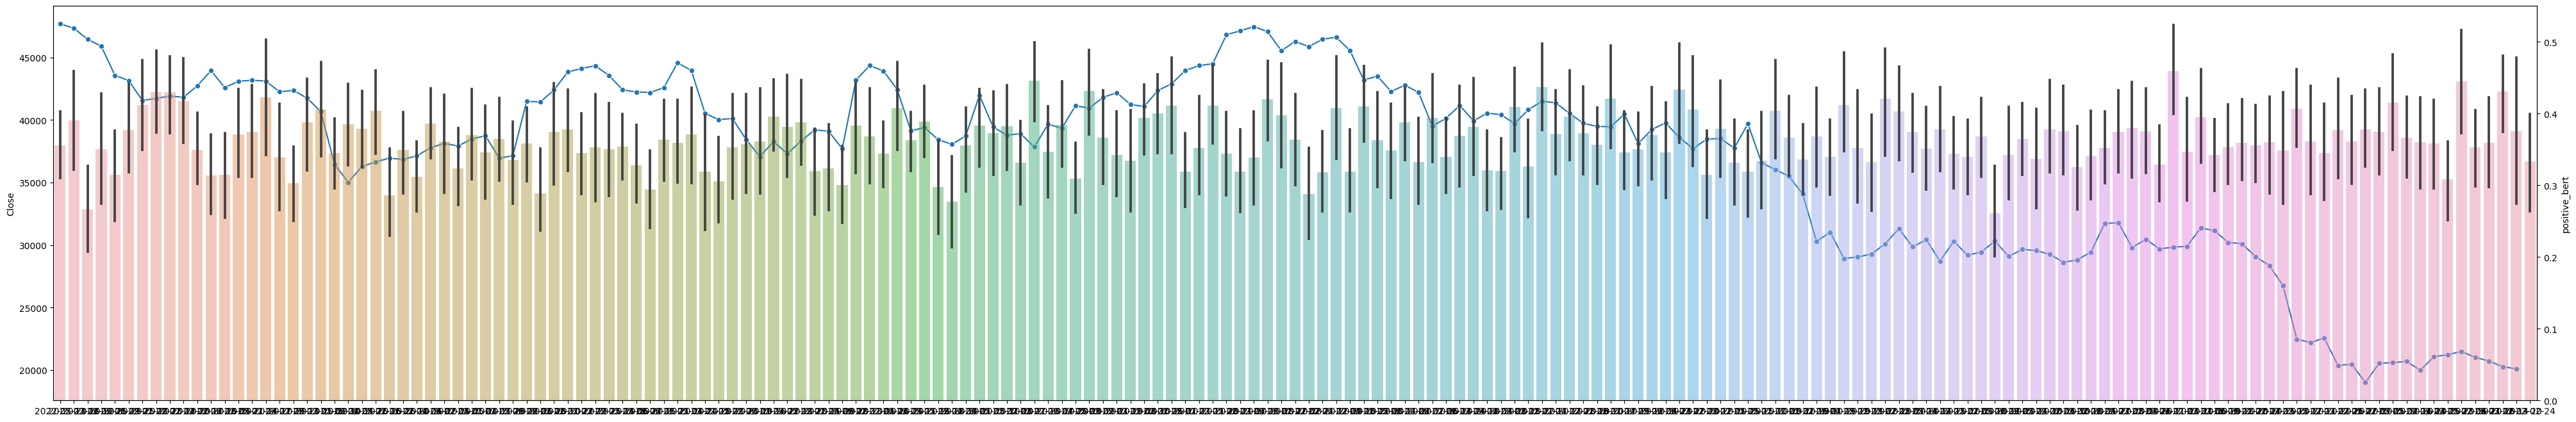

In [9]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(50,8))

sns.lineplot(data = data3['Close'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = data1, x=data1['date'], y=data1['positive_bert'], alpha=0.5, ax=ax2)
# sns.regplot(x=data1['date'], y=data1['positive_bert'], scatter=False)

<Axes: ylabel='Close'>

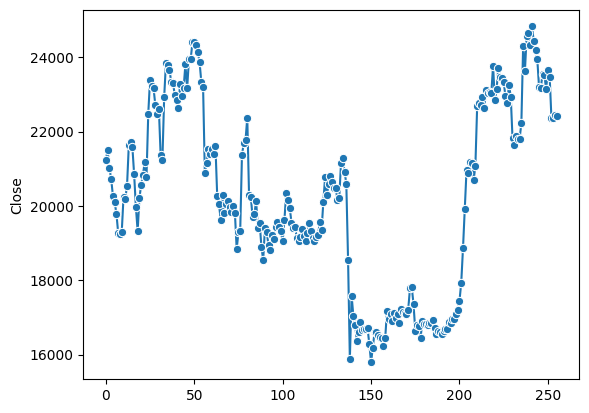

In [24]:
sns.lineplot(data = data3['Close'], marker='o', sort = False)